## EDA End to End

1. Problem Statement - Define the Pain Area of the Business and the probable factors driving it.

2. Hypothesis Formation

3. Univariate Analysis - One variable analysis 

   * Numerical columns - histogram, distplot, boxplot
   * Categorical Variable - Piechart, countplot,frequency plot

4. Bivariate Analysis - more than one variable 

   * Numerical Vs Numerical - Scatterplot
   * Category Vs Num - Boxplot, Violin Plot, 
   * Category Vs Category - Contigency table that would have frequencies basis categories... 

5. Dealing with missing values

6. Outlier Analysis & its Removal 

7. Feature Engineering

8. Transformation and Scaling aka Data Preprocessing Step

# DAY 1

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales = pd.read_csv('sales.csv')

In [4]:
# preview the data 

sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3


In [7]:
sales.shape

(8523, 13)

### Univariate Analysis

In [8]:
sales.columns         # target variable - problem variable 

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


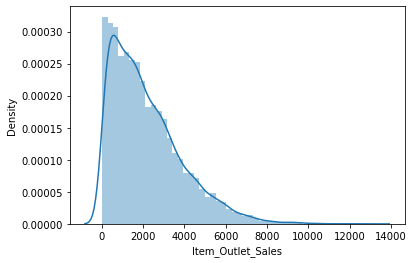

In [9]:
sns.distplot(sales.Item_Outlet_Sales)
plt.show()

In [7]:
# sns.distplot(sales['Item_Outlet_Sales'])     other way

In [8]:
sales['Item_Outlet_Sales'].skew()   # positive skewed data

1.1775306028542798

In [9]:
# desc statistics
sales.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [10]:
# mean>median    positive skewed

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


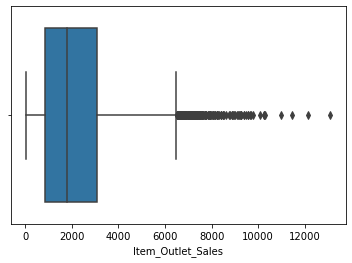

In [11]:
# box plot

sns.boxplot(sales.Item_Outlet_Sales)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


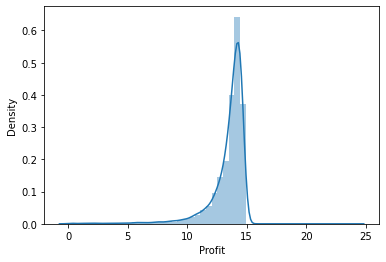

In [12]:
sns.distplot(sales.Profit)
plt.show()

In [13]:
sales.Profit.describe()

count    8523.000000
mean       13.414514
std         1.701840
min         0.100000
25%        13.150000
50%        13.900000
75%        14.300000
max        24.000000
Name: Profit, dtype: float64

In [14]:
sales.Item_Outlet_Sales.skew()

1.1775306028542798

In [15]:
sales['Profit'].skew()     
# negative skewed data  # negative  # skew will help to find out the type of skewed data - right or left 
# median is mid value

-3.3798077736299312

In [16]:
np.log(sales.Item_Outlet_Sales).skew()  # for reducing skewness 

-0.887753343209305

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


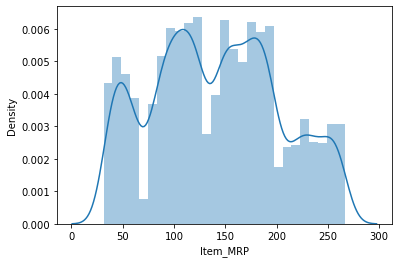

In [17]:
sns.distplot(sales.Item_MRP)
plt.show()

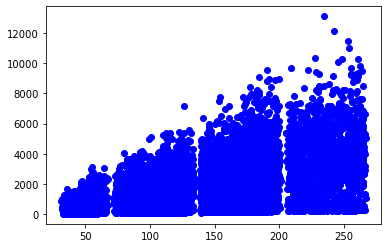

In [18]:
plt.scatter(x='Item_MRP', y='Item_Outlet_Sales',data = sales , color = 'blue')
plt.show()   # graphs show that data is clubbed

### BOXPLOT 

* Boxplot is a numerical summary of the data that consists of Min,Max,25th percentile, Median(50th) and 75th Percentile data
* We can identify the outliers basis the Boxplot
* We calculate the Inter Quartile Range(IQR) => 75-25
* Lower Limit = Q1 - 1.5* IQR
* Upper Limit = Q1 + 1.5* IQR


In [19]:
# Find the Q1, Q3 of item outlet sales

print('Q1: ', np.quantile(sales.Item_Outlet_Sales, 0.25))
print('Q2: ', np.quantile(sales.Item_Outlet_Sales, 0.50))
print('Q3: ', np.quantile(sales.Item_Outlet_Sales, 0.75))
print('Max:', np.quantile(sales.Item_Outlet_Sales, 1))

Q1:  834.2474
Q2:  1794.3310000000001
Q3:  3101.2964
Max: 13086.9648


In [20]:
sales.Item_Outlet_Sales.quantile(0.45)

1593.9252

In [21]:
# Quantile of whole data - 0.25
sales.quantile(0.25)

Item_Weight                     7.720000
Item_Visibility                 0.026989
Item_MRP                       93.800000
Outlet_Establishment_Year    1987.000000
Item_Outlet_Sales             834.247400
Profit                         13.150000
Name: 0.25, dtype: float64

### Basic Functions - mean, median, mode, variance, standard deviation

In [22]:
sales.mean()

Item_Weight                    11.676740
Item_Visibility                 0.066132
Item_MRP                      140.998838
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
Profit                         13.414514
dtype: float64

In [23]:
sales.median()

Item_Weight                    11.800000
Item_Visibility                 0.053931
Item_MRP                      142.700000
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
Profit                         13.900000
dtype: float64

In [24]:
sales.var()

Item_Weight                  3.337201e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.876071e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
Profit                       2.896258e+00
dtype: float64

In [25]:
sales.std(ddof = 1)    # ddof = 1 is used for calculating sample var  


# ddof degrees of freedom - for finding sample var and standard deviation


Item_Weight                     5.776851
Item_Visibility                 0.051598
Item_MRP                       62.258099
Outlet_Establishment_Year       8.371760
Item_Outlet_Sales            1706.499616
Profit                          1.701840
dtype: float64

### Covariance and Correlation

#### Correlation

In [26]:
sales.loc[:, ['Item_MRP','Item_Outlet_Sales']].corr()

,Item_MRP,Item_Outlet_Sales
Item_MRP,1.000000,0.567555
Item_Outlet_Sales,0.567555,1.000000


#### Covariance

In [27]:
np.cov(sales.Item_MRP, sales.Item_Outlet_Sales)   # positive   # negative

array([[   3876.07088459,   60299.00607842],
       [  60299.00607842, 2912140.93849972]])

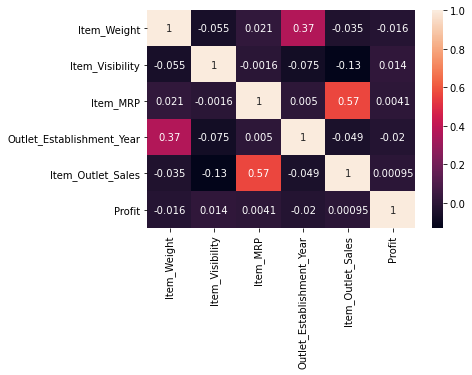

In [28]:
sns.heatmap(sales.corr(), annot = True )
plt.show()

### Categorical Data

In [29]:
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3


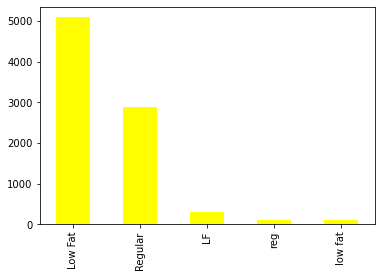

In [30]:
sales.Item_Fat_Content.value_counts().plot(kind="bar", color = 'yellow')
plt.show()

In [31]:
# replacing the values

sales.Item_Fat_Content.replace(to_replace= ['LF','low fat','reg'],
                              value = ['Low Fat', 'Low Fat','Regular'],inplace=True)

In [32]:
sales.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

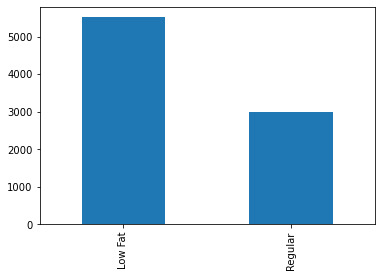

In [33]:
sales.Item_Fat_Content.value_counts().plot(kind = 'bar')

<AxesSubplot:>

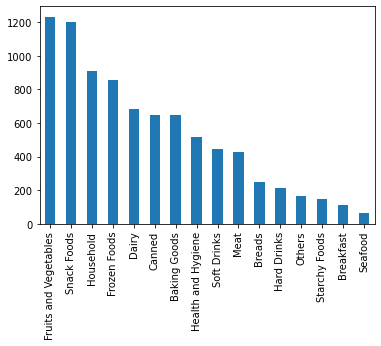

In [34]:
sales.Item_Type.value_counts().plot(kind = 'bar')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


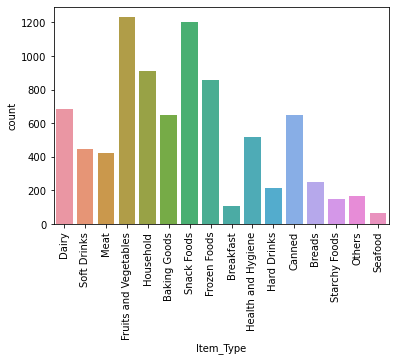

In [35]:
sns.countplot(sales.Item_Type)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

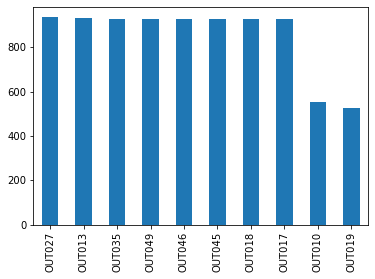

In [36]:
# plot outlet id
sales.Outlet_Identifier.value_counts().plot(kind='bar')

In [37]:
sales.Outlet_Location_Type.value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: Outlet_Location_Type, dtype: int64

In [38]:
sales.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Summary of Univariate Analysis

1. Average sales comes out to be 2181 dollars
2. The top 5 products sold by the store is Fruits & veggies, Dairy, Household, Frozen food, followed by snacks
3. The maximum outlets opened are OUT027 and min ones are OUT019 and OUT010
4. Most of the items that are sold in the store are low fat items
5. Most of the Outlets are in Tier 2 Location and mostly they are Stype 01

# DAY 2

## Bivariate Analysis

### Num Vs Num

In [39]:
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3


In [40]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

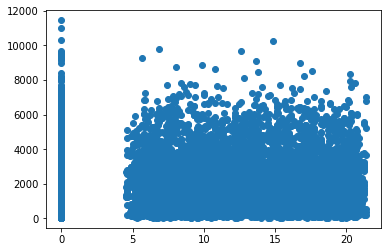

In [41]:
plt.scatter(sales.Item_Weight,sales.Item_Outlet_Sales)
plt.show()

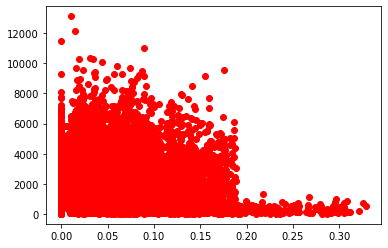

In [42]:
plt.scatter(sales.Item_Visibility , sales.Item_Outlet_Sales, color='red')
plt.show()

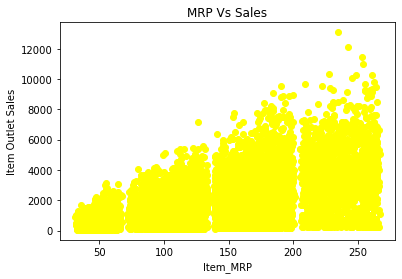

In [43]:
plt.scatter(sales.Item_MRP, sales.Item_Outlet_Sales, color = 'yellow')
plt.xlabel('Item_MRP')
plt.ylabel('Item Outlet Sales')
plt.title('MRP Vs Sales')
plt.show()

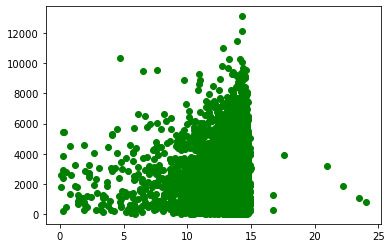

In [44]:
plt.scatter( sales.Profit,sales.Item_Outlet_Sales, color = 'green')
plt.show()

### Category Vs Num

In [45]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


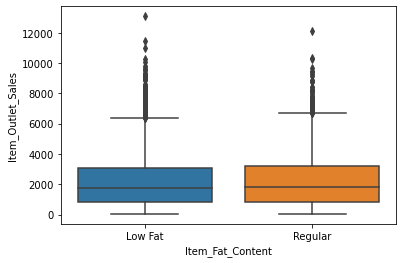

In [46]:
sns.boxplot(sales.Item_Fat_Content,sales.Item_Outlet_Sales)
plt.show()
# x = category y= number

In [47]:
sales.groupby('Item_Fat_Content')['Item_Outlet_Sales'].describe()  

#for checking the data information # if one cat n one num use describe

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,5517.0,2157.711534,1697.973824,33.2900,826.2578,1765.0358,3050.69560,13086.9648
Regular,3006.0,2224.561170,1721.480865,33.9558,857.5504,1844.5989,3198.66965,12117.5600


In [48]:
sales.groupby('Item_Fat_Content')['Outlet_Type'].value_counts()    # both category 

Item_Fat_Content  Outlet_Type      
Low Fat           Supermarket Type1    3609
                  Grocery Store         705
                  Supermarket Type3     605
                  Supermarket Type2     598
Regular           Supermarket Type1    1968
                  Grocery Store         378
                  Supermarket Type2     330
                  Supermarket Type3     330
Name: Outlet_Type, dtype: int64

In [49]:
sales.groupby('Item_Type')['Item_Outlet_Sales'].describe().head(2)

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.0822,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.7390,1860.2452,3145.90500,8958.3390


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


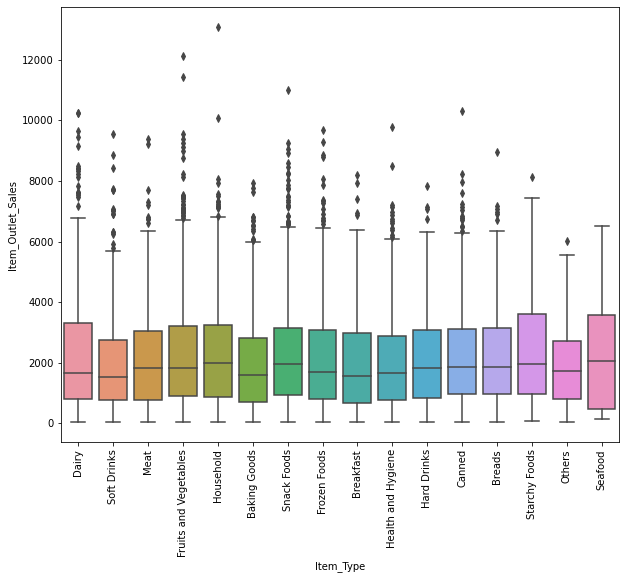

In [50]:
plt.figure(figsize = [10,8])
sns.boxplot(sales.Item_Type,sales.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


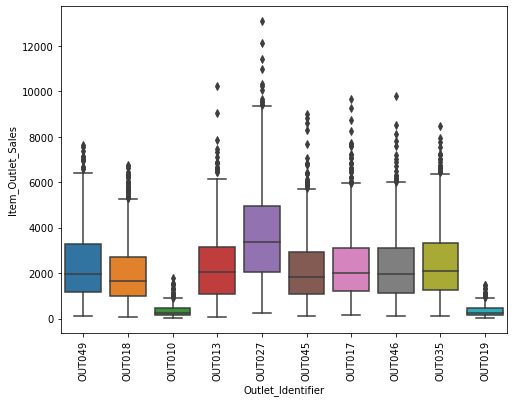

In [51]:
plt.figure(figsize = [8,6])
sns.boxplot(sales.Outlet_Identifier,sales.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


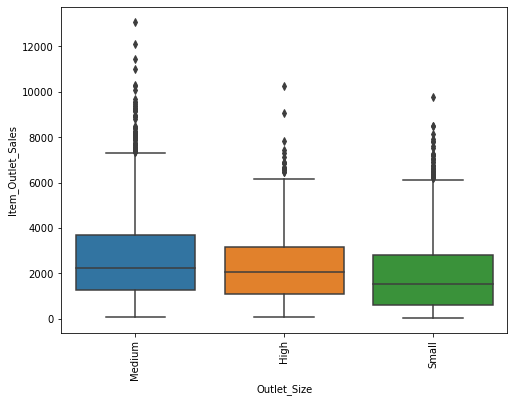

In [52]:
plt.figure(figsize = [8,6])
sns.boxplot(sales.Outlet_Size,sales.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

In [53]:
sales.loc[sales.Outlet_Identifier =='OUT027', 'Outlet_Size'].value_counts()

Medium    935
Name: Outlet_Size, dtype: int64

In [54]:
pd.DataFrame(sales.groupby('Outlet_Identifier')['Outlet_Size'].value_counts())

,,Outlet_Size
Outlet_Identifier,Outlet_Size,
OUT013,High,932
OUT018,Medium,928
OUT019,Small,528
OUT027,Medium,935
OUT035,Small,930
OUT046,Small,930
OUT049,Medium,930


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


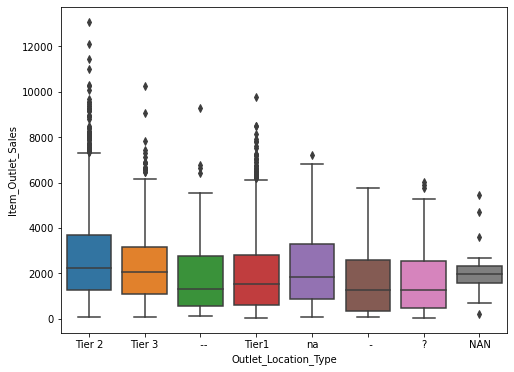

In [55]:
plt.figure(figsize=[8,6])
sns.boxplot(sales.Outlet_Location_Type,sales.Item_Outlet_Sales)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


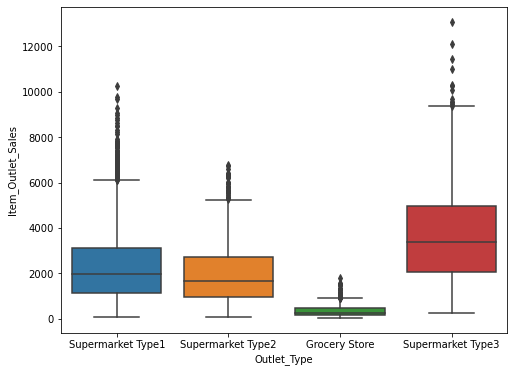

In [56]:
plt.figure(figsize=[8,6])
sns.boxplot(sales.Outlet_Type,sales.Item_Outlet_Sales)
plt.show()

In [57]:
sales.loc[sales.Outlet_Identifier =='OUT027', 'Outlet_Type']

7       Supermarket Type3
18      Supermarket Type3
21      Supermarket Type3
36      Supermarket Type3
38      Supermarket Type3
              ...        
8472    Supermarket Type3
8485    Supermarket Type3
8487    Supermarket Type3
8488    Supermarket Type3
8504    Supermarket Type3
Name: Outlet_Type, Length: 935, dtype: object

## Summary of Bivariate


## Missing Values

* Numerical Columns - Median Imputation is the best bet possible
* Categorical Variable - Mode Imputation is good

### Missing Value Imputation basis Pattern Identification

However, the best way to deal with the misisng value is to look into data and find out the optimal pattern that can be leveraged to impute the missing values

In [58]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [59]:
sales.Item_Weight.describe()

count    7774.000000
mean       11.676740
std         5.776851
min         0.000000
25%         7.720000
50%        11.800000
75%        16.500000
max        21.350000
Name: Item_Weight, dtype: float64

In [60]:
## sales.groupby('Item_Type')['Item_Weight'].describe()

In [61]:
sales.loc[sales.Item_Identifier=='DRC01','Item_Weight']

1       5.92
2272    5.92
2927     NaN
5029    5.92
5077    5.92
5218    5.92
Name: Item_Weight, dtype: float64

In [62]:
sales.loc[sales.Item_Identifier=='DRC01','Item_Weight'].mean()

5.92

In [63]:
sales.Item_Identifier

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [64]:
# Data frame with item weight na

sales.loc[sales.Item_Weight.isnull(),].head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
7,FDP10,NaN,Low Fat,0.12747,Snack Foods,107.8,OUT027,1985,Medium,Tier 2,Supermarket Type3,4022.7636,13.3


In [65]:
val = sales.loc[sales.Item_Identifier=='FDP10','Item_Weight'].mean()
val

19.0

In [66]:
sales.loc[7,'Item_Weight'] = val

In [67]:
dri = sales.loc[sales.Item_Identifier=='DRI11','Item_Weight'].mean()

In [68]:
sales.loc[18,'Item_Weight'] = dri

In [69]:
# dataframe with row nos and ids
rownos = sales.loc[sales.Item_Weight.isnull(),].index
print(rownos)
ids = sales.loc[sales.Item_Weight.isnull(),]['Item_Identifier']
print(ids)

Int64Index([  21,   23,   29,  136,  153,  161,  168,  178,  180,  182,
            ...
            8372, 8373, 8375, 8383, 8390, 8404, 8405, 8422, 8435, 8442],
           dtype='int64', length=747)
21      FDW12
23      FDC37
29      FDC14
136     FDH35
153     DRK12
        ...  
8404    DRH39
8405    FDB09
8422    FDD08
8435    FDT48
8442    FDX40
Name: Item_Identifier, Length: 747, dtype: object


In [70]:
# final loop
for i in range(len(rownos)):
    sales.loc[rownos[i],'Item_Weight'] = sales.loc[sales.Item_Identifier==ids[rownos[i]],'Item_Weight'].mean()
## 

In [71]:
sales.loc[sales.Item_Weight.isnull(),]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0,OUT027,1985,Medium,Tier 2,Supermarket Type3,4434.2280,14.5
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2,OUT019,1985,Small,Tier1,Grocery Store,120.5098,12.3


In [72]:
for i in rownos:
    sales.loc[i,'Item_Weight'] = sales.loc[sales.Item_Identifier==ids[i],'Item_Weight'].mean()

In [73]:
sales.loc[sales.Item_Weight.isnull(),]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0,OUT027,1985,Medium,Tier 2,Supermarket Type3,4434.2280,14.5
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2,OUT019,1985,Small,Tier1,Grocery Store,120.5098,12.3


In [74]:
zeroes = sales.loc[sales.Item_Weight == 0].index
zeroes

Int64Index([  36,   38,   39,   49,   59,   62,   63,   64,   77,   83,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=714)

In [75]:
zeroid = sales.loc[sales.Item_Weight == 0]['Item_Identifier']
zeroid

36      FDV20
38      FDX10
39      FDB34
49      FDS02
59      FDI26
        ...  
8485    DRK37
8487    DRG13
8488    NCN14
8490    FDU44
8504    NCN18
Name: Item_Identifier, Length: 714, dtype: object

In [76]:
for i in zeroes:
    sales.loc[i,'Item_Weight'] = sales.loc[sales.Item_Identifier==zeroid[i],'Item_Weight'].mean()

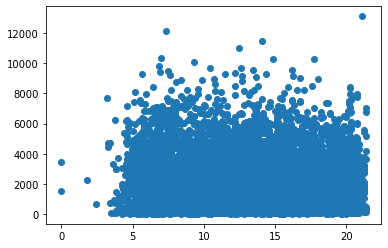

In [77]:
plt.scatter(sales.Item_Weight,sales.Item_Outlet_Sales)   # null values gets filled

In [78]:
sales.loc[sales.Item_Weight == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
927,FDN52,0.0,Regular,0.130933,Frozen Foods,86.9,OUT027,1985,Medium,Tier 2,Supermarket Type3,1569.9564,14.1
4187,FDE52,0.0,Regular,0.029742,Dairy,89.0,OUT027,1985,Medium,Tier 2,Supermarket Type3,3453.5046,13.9


In [79]:
sales.isnull().sum()  # checked 

Item_Identifier                 0
Item_Weight                     2
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [80]:
sales.loc[sales.Outlet_Size.isnull(),'Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [81]:
pd.DataFrame(sales.groupby('Outlet_Size')['Outlet_Type'].value_counts())

Outlet_Type
Outlet_Size Outlet_Type                   
High        Supermarket Type1          932
Medium      Supermarket Type3          935
            Supermarket Type1          930
            Supermarket Type2          928
Small       Supermarket Type1         1860
            Grocery Store              528

In [82]:
sales.Outlet_Size.mode()

0    Medium
dtype: object

In [83]:
# generating outlet id for super1
sales.loc[sales.Outlet_Type=='Supermarket Type1',['Outlet_Identifier','Outlet_Size']].value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT049             Medium         930
OUT046             Small          930
OUT035             Small          930
dtype: int64

In [84]:
#outlet id and size where the type is s1
sales.loc[sales.Outlet_Size.isnull(),'Outlet_Size'] = 'Small'

In [85]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     2
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

## One Hot Encoding 

* pd.get_dummies(df)
* changes the categories of a column into seperate columns
* values will be 0 and 1 (1 for matching category else 0)

In [86]:
sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [87]:
perisable = ['Dairy', 'Meat', 'Fruits and Vegetables','Frozen Foods',
       'Breakfast',
       'Breads',]

In [88]:
def perish(x):
    if (x in perisable):
        return('Perisables')
    else:
        return('Non Perisables')

In [89]:
pd.get_dummies(sales.Item_Type.apply(perish))

,Non Perisables,Perisables
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
8518,1,0
8519,1,0
8520,1,0
8521,1,0


# DAY 3

## ONE HOT CODING

* Binning (name/variable category)
* Frequency coding (num)

###  Feature Engineering

In [90]:
# Binning

sales['Item_TypeBinned'] = sales.Item_Type.apply(perish)

In [91]:
sales.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perisables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non Perisables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,Perisables
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Small,NaN,Grocery Store,732.3800,13.6,Perisables
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,Non Perisables


In [92]:
sales.Item_Identifier[0][:2]

'FD'

In [93]:
Ids = []
for i in sales.Item_Identifier:
    Ids.append(i[:2])

In [94]:
# Saving it in dataframe

sales['Item_Ids'] = pd.Series(Ids)

In [95]:
sales.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perisables,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non Perisables,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,Perisables,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Small,NaN,Grocery Store,732.3800,13.6,Perisables,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,Non Perisables,NC


In [96]:
sales.loc[sales.Item_Ids == 'NC','Item_Fat_Content']='Non Edible'

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


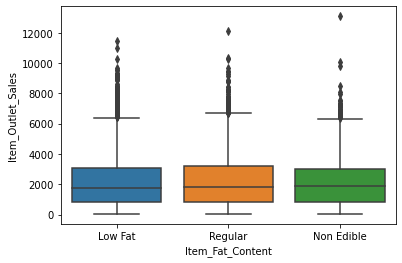

In [97]:
sns.boxplot(sales.Item_Fat_Content,sales.Item_Outlet_Sales)
plt.show()

In [98]:
sales.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perisables,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non Perisables,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,Perisables,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Small,NaN,Grocery Store,732.3800,13.6,Perisables,FD
4,NCD19,8.93,Non Edible,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,Non Perisables,NC


In [99]:
## Keep out027 and convert rest in others

In [100]:
def New_Outlet(x):
    if (x == 'OUT027'):
        return('OUT027')
    else:
        return('Others')

In [101]:
sales['Outlet_id'] = sales.Outlet_Identifier.apply(New_Outlet)

In [102]:
sales.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids,Outlet_id
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.138,11.5,Perisables,FD,Others


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_id', ylabel='Item_Outlet_Sales'>

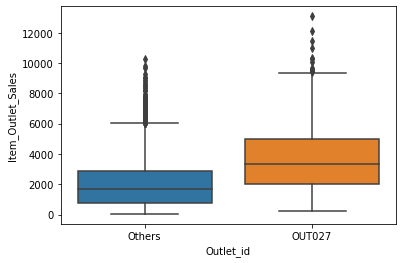

In [103]:
sns.boxplot(sales.Outlet_id,sales.Item_Outlet_Sales)

In [104]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids,Outlet_id
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perisables,FD,Others
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non Perisables,DR,Others
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,Perisables,FD,Others
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Small,NaN,Grocery Store,732.3800,13.6,Perisables,FD,Others
4,NCD19,8.93,Non Edible,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,Non Perisables,NC,Others


In [105]:
# Finding outlet age

sales['Outlet_Age'] = 2013 - sales.Outlet_Establishment_Year

In [106]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids,Outlet_id,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perisables,FD,Others,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non Perisables,DR,Others,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,Perisables,FD,Others,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Small,NaN,Grocery Store,732.3800,13.6,Perisables,FD,Others,15
4,NCD19,8.93,Non Edible,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,Non Perisables,NC,Others,26


In [107]:
# drop column outlet id, item id , item type, outlet establishment year 

finalsales = sales.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [108]:
finalsales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids,Outlet_id,Outlet_Age
0,9.30,Low Fat,0.016047,249.8,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perisables,FD,Others,14
1,5.92,Regular,0.019278,48.3,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non Perisables,DR,Others,4
2,17.50,Low Fat,0.016760,141.6,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,Perisables,FD,Others,14
3,19.20,Regular,0.000000,182.1,Small,NaN,Grocery Store,732.3800,13.6,Perisables,FD,Others,15
4,8.93,Non Edible,0.000000,53.9,High,Tier 3,Supermarket Type1,994.7052,14.1,Non Perisables,NC,Others,26


In [109]:
pd.get_dummies(sales).shape

(8523, 1617)

In [110]:
pd.get_dummies(finalsales).shape

(8523, 31)

In [111]:
val = finalsales.Outlet_Location_Type.mode()

In [112]:
finalsales.Outlet_Location_Type.fillna(val,inplace= True)

In [113]:
finalsales.isnull().sum()

Item_Weight                2
Item_Fat_Content           0
Item_Visibility            0
Item_MRP                   0
Outlet_Size                0
Outlet_Location_Type    2050
Outlet_Type                0
Item_Outlet_Sales          0
Profit                     0
Item_TypeBinned            0
Item_Ids                   0
Outlet_id                  0
Outlet_Age                 0
dtype: int64

In [114]:
finalsales['Outlet_Location_Type'] = finalsales.Outlet_Location_Type.fillna(value='Tier 2')

In [115]:
finalsales.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids,Outlet_id,Outlet_Age
0,9.30,Low Fat,0.016047,249.8,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perisables,FD,Others,14
1,5.92,Regular,0.019278,48.3,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non Perisables,DR,Others,4


## TRANSFORMATION

* Squareroot Transformation
* Exponential Transformation
* Log Transformation
* Cuberoot Transfoartion
* Box Cox Transformation (normal distribution) (preference)
* Prob Plot to Cross verify

## Z Score Transformation

* (xi-mean)/std deviation

## Normalization

* (x-min)/(max-min)   
* [0,1]

In [5]:
marks = pd.DataFrame({'Marks':[95,88,65,33,74,81,99,55,68,48]})

In [6]:
from sklearn.preprocessing import StandardScaler # OneHotEncoder, LabelEncoder   # sklearn is a machine learning library

In [7]:
sc = StandardScaler()  # creating a machine that will learn from data (machine instances) 

In [8]:
sc.fit_transform(marks)      # parameters of sc - sc.fit, sc.fit_transform  # sc.fit only give mean values where as sc.fit.transform will transform the value

array([[ 1.21539026],
       [ 0.86671273],
       [-0.27894203],
       [-1.87289646],
       [ 0.16935766],
       [ 0.51803519],
       [ 1.41463456],
       [-0.77705279],
       [-0.1295088 ],
       [-1.12573032]])

In [120]:
pd.DataFrame(sc.fit_transform(marks)).describe()

,0
count,1.000000e+01
mean,2.442491e-16
std,1.054093e+00
min,-1.872896e+00
25%,-6.525251e-01
50%,1.992443e-02
75%,7.795433e-01
max,1.414635e+00


In [9]:
trf = sc.transform(marks)
trf

array([[ 1.21539026],
       [ 0.86671273],
       [-0.27894203],
       [-1.87289646],
       [ 0.16935766],
       [ 0.51803519],
       [ 1.41463456],
       [-0.77705279],
       [-0.1295088 ],
       [-1.12573032]])

In [122]:
sc.inverse_transform(trf)

array([[95.],
       [88.],
       [65.],
       [33.],
       [74.],
       [81.],
       [99.],
       [55.],
       [68.],
       [48.]])

In [123]:
from sklearn.preprocessing import Normalizer , normalize

In [124]:
nc = Normalizer()

In [125]:
# find min and maxx and convert it manually

In [126]:
colnames = finalsales.dtypes[finalsales.dtypes=='float64'].index

In [127]:
pd.DataFrame(sc.fit_transform(finalsales[colnames].dropna()),columns=[colnames])  

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
0,-0.711619,-0.970642,1.747425,0.910678,-1.124958
1,-1.440973,-0.908007,-1.488953,-1.018499,0.520304
2,1.057819,-0.956824,0.009579,-0.049228,0.637823
3,1.424654,-1.281740,0.660066,-0.849150,0.108989
4,-0.791459,-1.281740,-1.399009,-0.695409,0.402785
...,...,...,...,...,...
8516,-1.237056,-0.180919,1.180457,0.349953,0.402785
8517,-0.910141,-0.370924,-0.526873,-0.956456,0.461545
8518,-0.431098,-0.599608,-0.897892,-0.579127,-2.300146
8519,-1.162610,1.533554,-0.608786,-0.196726,0.461545


In [128]:
# Normalization 
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [129]:
pd.DataFrame(minmax.fit_transform(marks)).describe()

,0
count,10.000000
mean,0.569697
std,0.320633
min,0.000000
25%,0.371212
50%,0.575758
75%,0.806818
max,1.000000


#### Euclidean (flight,google map) and Manhattan (uber) distance (cover) 
   

In [130]:
# Applying Log Transformation on item outlet sales
print("skewness before transform: ", finalsales.Item_Outlet_Sales.skew())

skewness before transform:  1.1775306028542798


In [131]:
logtransform = np.log(finalsales.Item_Outlet_Sales)
print("Log tranform skew: ", pd.DataFrame(logtransform).skew())

Log tranform skew:  Item_Outlet_Sales   -0.887753
dtype: float64


In [132]:
from scipy.stats import probplot   # used to check the normalization of the data 

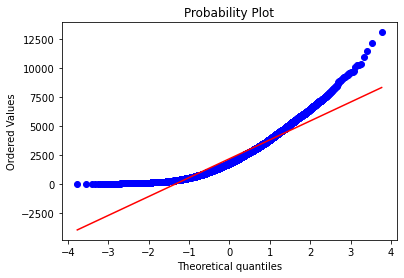

In [133]:
probplot(finalsales.Item_Outlet_Sales,plot=plt)   # red line # blue lines 
plt.show()

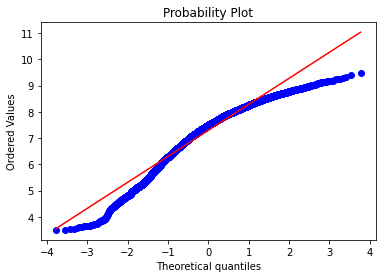

In [134]:
probplot(logtransform,plot=plt)
plt.show()

### Box Cox Transformation

In [135]:
from scipy.stats import boxcox

In [136]:
target, value = boxcox(finalsales.Item_Outlet_Sales)   # box cox generates two values, target = transformed value, value = lambda value

In [137]:
pd.DataFrame(target).skew()

0   -0.074978
dtype: float64

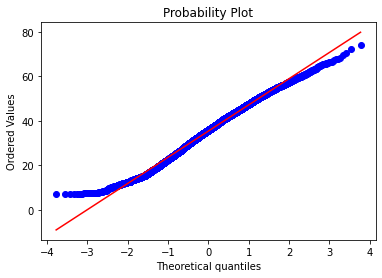

In [138]:
probplot(target,plot=plt)
plt.show()

* normal - probablity 
* target variable - item_outlet_sale

In [140]:
# normalize = percentage

In [142]:
# if there r 90-95% missing data in a column its better to drop that column 

# DAY 4

## Outlier Using Boxplot

In [144]:
finalsales.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids,Outlet_id,Outlet_Age
0,9.30,Low Fat,0.016047,249.8,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perisables,FD,Others,14
1,5.92,Regular,0.019278,48.3,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non Perisables,DR,Others,4


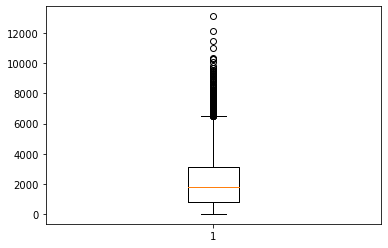

In [146]:
plt.boxplot(finalsales.Item_Outlet_Sales)
plt.show()

In [201]:
# calc quantile
q1 = np.quantile(sales.Item_Outlet_Sales,0.25)
q3 = np.quantile(sales.Item_Outlet_Sales,0.75)

# IQR
IQR = q3-q1

# Rule - Outlier is any value greater than Q3 + 1.5 * IQR
# Rule - Inlier is any value less than Q1 - 1.5 * IQR

outliers = q3+(1.5*IQR)
inliers = q1-(1.5*IQR)

In [170]:
finalsales[finalsales['Item_Outlet_Sales']>outliers]['Item_Outlet_Sales'].count()##

186

In [166]:
finalsales.shape

(8523, 13)

In [168]:
8523-186

8337

In [174]:
# extratcting data frame with sales having no outliers
# ~ : it simply says that give me all those values which does not satisfy the criterion (works as !=)


wt_outliers = finalsales[~(finalsales['Item_Outlet_Sales']>outliers)]
wt_outliers.shape[0]

8337

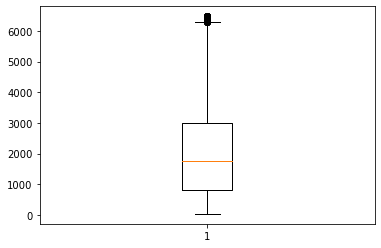

In [176]:
plt.boxplot(wt_outliers.Item_Outlet_Sales)
plt.show() 
# less outliers

In [179]:
## item_weight and item_visibility
finalsales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids,Outlet_id,Outlet_Age
0,9.30,Low Fat,0.016047,249.8,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perisables,FD,Others,14
1,5.92,Regular,0.019278,48.3,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non Perisables,DR,Others,4
2,17.50,Low Fat,0.016760,141.6,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,Perisables,FD,Others,14
3,19.20,Regular,0.000000,182.1,Small,Tier 2,Grocery Store,732.3800,13.6,Perisables,FD,Others,15
4,8.93,Non Edible,0.000000,53.9,High,Tier 3,Supermarket Type1,994.7052,14.1,Non Perisables,NC,Others,26


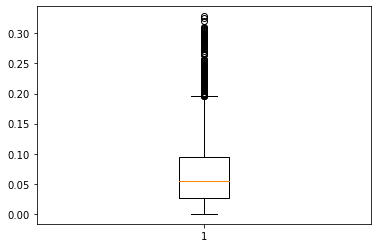

In [181]:
plt.boxplot(finalsales.Item_Visibility)
plt.show()

In [184]:
q3 = np.quantile(finalsales.Item_Visibility,0.75)
q1 = np.quantile(finalsales.Item_Visibility,0.25)
iqr = q3-q1
outliers = q3+(1.5*iqr)

In [195]:
finalsales[finalsales['Item_Visibility']>outliers]['Item_Visibility'].count()

144

In [190]:
finalsales.shape[0]

8523

In [192]:
8523-144

8379

In [188]:
wt_out_in = finalsales[~(finalsales['Item_Visibility']>outliers)]
wt_out_in.shape[0]

8379

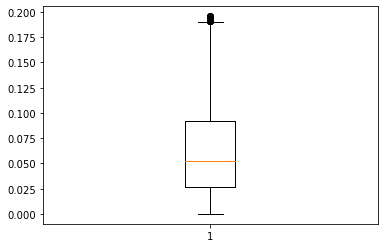

In [191]:
plt.boxplot(wt_out_in.Item_Visibility)
plt.show()

In [203]:
finalsales[~((finalsales.Item_Outlet_Sales<inliers) | (finalsales.Item_Outlet_Sales>outliers))].shape
# if there are inliers and outliers both

(8337, 13)

## Outlier Removal Using St Normal Distribution 

* Rule is that any value or set of values if less than 3 sigma or more than 3 sigma is considered to be an outlier

* Step 01: Apply Standard scalar so that we can get the Z score values
* Step 02: Apply the condition of < -3 and > 3 sigma
* Step 03: Extract the data frame with no or less outliers

In [212]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [213]:
scaled_data = pd.DataFrame(sc.fit_transform(pd.DataFrame(finalsales.Item_Outlet_Sales)),columns = ['Item_Outlet_Sales'])

In [214]:
df = scaled_data[~((scaled_data.Item_Outlet_Sales<-3) | (scaled_data.Item_Outlet_Sales>3))]

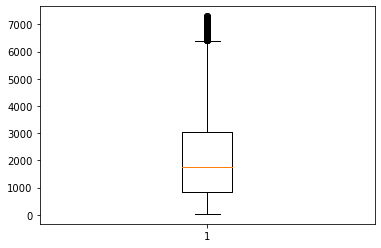

In [215]:
plt.boxplot(sc.inverse_transform(df))
plt.show()

In [217]:
pd.DataFrame(sc.inverse_transform(df)).describe()

,0
count,8433.000000
mean,2114.297126
std,1582.783405
min,33.290000
25%,822.263000
50%,1768.364800
75%,3056.022000
max,7298.499600


### Ffill and Bfill

In [219]:
vals = [20,19,np.NaN,20,21,np.NaN]

In [220]:
pd.DataFrame(vals).bfill(axis=0)

,0
0,20.0
1,19.0
2,20.0
3,20.0
4,21.0
5,NaN


In [221]:
pd.DataFrame(vals).ffill(axis=0)

,0
0,20.0
1,19.0
2,19.0
3,20.0
4,21.0
5,21.0


### Train_Test_Split

In [222]:
from sklearn.model_selection import train_test_split

In [228]:
# x : total predictors
# y : target variable
# test_size = 0.20,0.10,0.30

x = finalsales.drop('Item_Outlet_Sales',axis=1)   # we droped item_outlet_sales bcz it's a target varaible 
y = finalsales.Item_Outlet_Sales           # x cannot include y 

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20)

In [229]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ', ytest.shape)

xtrain shape:  (6818, 12)
xtest shape:  (1705, 12)
ytrain shape:  (6818,)
ytest shape:  (1705,)
